# Homework 2
##### Name: Muhammad Talha Salani
##### ID: ms07725
##### Email: ms07725@st.habib.edu.pk

### Part 1 (30 points) 

#### Use FIFA_Players_Data.csv dataset.
#### Below are some suggestions that might help you cleaning the data and make it more suitable for
#### EDA :

#### • “joined”, “nation_position” and “nation_jersey_number” need imputation and missing values can be filled using appropriate values. 

#### • “nation_position” value “GK” contains all empty values for pace, shooting, passing etc. columns. You can fill in values or completely drop GK rows. Choice is yours. 

#### • Many values of “skill_ball_control” and “power_stamina” contain numbers with + or -. You need to process it and calculate the final number based on addition or subtraction 

#### (make sure you change the data type of column as integer after calculation) 


#### Please provide reason/explanation for all the data cleaning and data imputation (filling missing values).

In [1472]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

df = pd.read_csv('FIFA_Players_Data.csv')

In [1473]:
df.isnull().sum()

sofifa_id                       0
short_name                      0
long_name                       0
age                             0
dob                             0
height_cm                       0
weight_kg                       0
nationality                     0
club                            0
overall                         0
potential                       0
player_positions                0
preferred_foot                  0
international_reputation        0
weak_foot                       0
skill_moves                     0
work_rate                       0
body_type                       0
real_face                       0
release_clause_eur          15465
team_position                 232
team_jersey_number            232
joined                       1151
contract_valid_until          239
nation_position             14409
nation_jersey_number        14409
pace                         1703
shooting                     1703
passing                      1703
dribbling     

In [1474]:
del df['release_clause_eur']

Dropping the column 'release_clause_eur', since its entirely empty, and of no use!

In [1476]:
df.isnull().sum()

sofifa_id                       0
short_name                      0
long_name                       0
age                             0
dob                             0
height_cm                       0
weight_kg                       0
nationality                     0
club                            0
overall                         0
potential                       0
player_positions                0
preferred_foot                  0
international_reputation        0
weak_foot                       0
skill_moves                     0
work_rate                       0
body_type                       0
real_face                       0
team_position                 232
team_jersey_number            232
joined                       1151
contract_valid_until          239
nation_position             14409
nation_jersey_number        14409
pace                         1703
shooting                     1703
passing                      1703
dribbling                    1703
defending     

In [1477]:
def get_first_position(positions):
    if isinstance(positions, str):
        return positions.split(', ')[0]
    return positions

df['team_position'] = df['team_position'].fillna(df['player_positions'].apply(get_first_position))


In [1478]:
df.isnull().sum()

sofifa_id                       0
short_name                      0
long_name                       0
age                             0
dob                             0
height_cm                       0
weight_kg                       0
nationality                     0
club                            0
overall                         0
potential                       0
player_positions                0
preferred_foot                  0
international_reputation        0
weak_foot                       0
skill_moves                     0
work_rate                       0
body_type                       0
real_face                       0
team_position                   0
team_jersey_number            232
joined                       1151
contract_valid_until          239
nation_position             14409
nation_jersey_number        14409
pace                         1703
shooting                     1703
passing                      1703
dribbling                    1703
defending     

The team_position column was created by extracting the primary position from the player_positions column using the get_first_position function. This function effectively handles missing values by providing a default position. By focusing on the primary position, the team_position column offers a more accurate representation of each player's main role on the team. This enhancement improves the data's quality and reliability for future analyses.

In [1480]:
df.isnull().sum()

sofifa_id                       0
short_name                      0
long_name                       0
age                             0
dob                             0
height_cm                       0
weight_kg                       0
nationality                     0
club                            0
overall                         0
potential                       0
player_positions                0
preferred_foot                  0
international_reputation        0
weak_foot                       0
skill_moves                     0
work_rate                       0
body_type                       0
real_face                       0
team_position                   0
team_jersey_number            232
joined                       1151
contract_valid_until          239
nation_position             14409
nation_jersey_number        14409
pace                         1703
shooting                     1703
passing                      1703
dribbling                    1703
defending     

In [1481]:
df['team_jersey_number'].value_counts()

team_jersey_number
7.0     515
10.0    512
8.0     511
5.0     504
11.0    501
       ... 
79.0      4
59.0      2
73.0      2
74.0      1
64.0      1
Name: count, Length: 99, dtype: int64

In [1482]:
df['team_jersey_number']= df['team_jersey_number'].fillna(df['team_jersey_number'].mode()[0])

To fill in the gaps in the data, the mode value—the number that appears the most frequently—was entered into the team_jersey_number column. By using the mode, one can make sure that the imputation is based on the jersey number that is most frequently seen in the dataset, giving the missing entries a reasonable and representative value. This technique guarantees consistency throughout the column while assisting in preserving the data's integrity.

In [1484]:
df.isnull().sum()

sofifa_id                       0
short_name                      0
long_name                       0
age                             0
dob                             0
height_cm                       0
weight_kg                       0
nationality                     0
club                            0
overall                         0
potential                       0
player_positions                0
preferred_foot                  0
international_reputation        0
weak_foot                       0
skill_moves                     0
work_rate                       0
body_type                       0
real_face                       0
team_position                   0
team_jersey_number              0
joined                       1151
contract_valid_until          239
nation_position             14409
nation_jersey_number        14409
pace                         1703
shooting                     1703
passing                      1703
dribbling                    1703
defending     

In [1485]:
df['nation_position'] = df['nation_position'].fillna(df['team_position'])
df['nation_jersey_number'] = df['nation_jersey_number'].fillna(df['team_jersey_number'])

-Populating the nation_position with the team position, because most of the players follow this pattern. For example, if Messi plays as a CF at Barcelona, he is most likely to play the same in the position for Argentina.

-Same reasoning goes for nation_jersey_number and team_jersey_number in most cases!

In [1487]:
df.isnull().sum()

sofifa_id                      0
short_name                     0
long_name                      0
age                            0
dob                            0
height_cm                      0
weight_kg                      0
nationality                    0
club                           0
overall                        0
potential                      0
player_positions               0
preferred_foot                 0
international_reputation       0
weak_foot                      0
skill_moves                    0
work_rate                      0
body_type                      0
real_face                      0
team_position                  0
team_jersey_number             0
joined                      1151
contract_valid_until         239
nation_position                0
nation_jersey_number           0
pace                        1703
shooting                    1703
passing                     1703
dribbling                   1703
defending                   1703
physic    

In [1488]:
def calculate_joined_date_alt(dob_str):
    dob = datetime.strptime(dob_str, '%m/%d/%Y')
    
    # Adding 18 years to the date of birth, since its pretty common for a player to join a club at the age of 18
    
    joined_year = dob.year + 18
    return datetime(joined_year, 7, 1).strftime('%m/%d/%Y')

df['joined'] = df['joined'].fillna(df['dob'].apply(calculate_joined_date_alt))

In [1489]:
df['joined'][10]

'07/01/2004'

In [1490]:
#checking for the null values in GK
df[(df['nation_position']=='GK') & (df['shooting'].isnull())]

,sofifa_id,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,...,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,skill_ball_control,power_stamina
4,167495,M. Neuer,Manuel Neuer,28,3/27/1986,193,92,Germany,FC Bayern München,90,...,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,31,44+9
20,192119,T. Courtois,Thibaut Courtois,22,5/11/1992,199,88,Belgium,Chelsea,86,...,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,23,38
38,167948,H. Lloris,Hugo Lloris,27,12/26/1986,188,78,France,Tottenham Hotspur,85,...,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,34,41-5
42,48940,P. Čech,Petr Čech,32,5/20/1982,196,90,Czech Republic,Chelsea,85,...,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,32,32
53,5479,Casillas,Iker Casillas Fernández,33,5/20/1981,185,84,Spain,Real Madrid,84,...,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,26,43-3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14391,201354,R. Marcone,Richard Gabriel Marcone,21,1/21/1993,186,81,Italy,Trapani,53,...,GK,22.0,NaN,NaN,NaN,NaN,NaN,NaN,28,20-30
14797,180671,S. Al Harbi,Saeed Al Harbi,32,8/28/1981,183,89,Saudi Arabia,Al Shoulla,52,...,GK,22.0,NaN,NaN,NaN,NaN,NaN,NaN,25,38
14920,222070,J. Berner,John Berner,23,2/14/1991,191,92,United States,Colorado Rapids,51,...,GK,12.0,NaN,NaN,NaN,NaN,NaN,NaN,23,39-1
14966,192544,R. Coulter,Ryan Coulter,25,2/8/1989,185,85,Republic of Ireland,Athlone Town,51,...,GK,21.0,NaN,NaN,NaN,NaN,NaN,NaN,23,32


In [1491]:
# choosing to drop all the goalkeepers as most of their attributes are NULL!
df = df[df['player_positions'] != 'GK']

In [1492]:
import re
def process_skill_alt(skill):
    pattern = r'(\d+)([+-]\d+)?'
    
    match = re.match(pattern, str(skill))
    
    if match:
        base = int(match.group(1))  
        modifier = int(match.group(2)) if match.group(2) else 0  
        return base + modifier  
    else:
        return int(skill) 

df.loc[:, 'skill_ball_control'] = df['skill_ball_control'].apply(process_skill_alt)
df.loc[:, 'power_stamina'] = df['power_stamina'].apply(process_skill_alt)


In [1493]:
df[['skill_ball_control','power_stamina']]

,skill_ball_control,power_stamina
0,96,76
1,89,89
2,91,89
3,90,78
5,89,86
...,...,...
15460,26,56
15461,30,47
15462,32,87
15463,35,70


In [1494]:
df.isnull().sum()

sofifa_id                     0
short_name                    0
long_name                     0
age                           0
dob                           0
height_cm                     0
weight_kg                     0
nationality                   0
club                          0
overall                       0
potential                     0
player_positions              0
preferred_foot                0
international_reputation      0
weak_foot                     0
skill_moves                   0
work_rate                     0
body_type                     0
real_face                     0
team_position                 0
team_jersey_number            0
joined                        0
contract_valid_until        203
nation_position               0
nation_jersey_number          0
pace                          0
shooting                      0
passing                       0
dribbling                     0
defending                     0
physic                        0
skill_ba

In [1495]:
df['contract_valid_until']= df['contract_valid_until'].fillna(df['contract_valid_until'].mode()[0])

To remedy missing data, the mode value (the most frequent contract end date) was entered into the contract_valid_until column. By using the mode, the imputation is guaranteed to reflect the most often observed contract expiration date in the dataset. This technique contributes to the consistency and completeness of the data, enabling more precise analysis and insights on the lengths of player contracts.

In [1497]:
df.isnull().sum()

sofifa_id                   0
short_name                  0
long_name                   0
age                         0
dob                         0
height_cm                   0
weight_kg                   0
nationality                 0
club                        0
overall                     0
potential                   0
player_positions            0
preferred_foot              0
international_reputation    0
weak_foot                   0
skill_moves                 0
work_rate                   0
body_type                   0
real_face                   0
team_position               0
team_jersey_number          0
joined                      0
contract_valid_until        0
nation_position             0
nation_jersey_number        0
pace                        0
shooting                    0
passing                     0
dribbling                   0
defending                   0
physic                      0
skill_ball_control          0
power_stamina               0
dtype: int

### All Cleaned!

### Part 2 (70 points)
#### You do not need to use all the columns/attributes for Part 2. Use your imaginations to come up with interesting Univariate, Bivariate and Multivariate analysis.

### • Generate appropriate summary (count, mean, median or mode) tables using group keyword in pandas.
#### o Include at least two tables analysis or results

### • Generate appropriate visualizations for Univariate analysis
#### o At least one bar chart
#### o At least one histogram

### • Generate appropriate visualizations for Bivariate analysis
#### o At least one scatter plot (continuous vs continuous)
#### o At least one visualization for (discrete vs continuous)
#### o One correlation plot

### • Generate one Multivariate visualization (more than two variables)

#### Include appropriate titles and labels for all the visualization and tables. Interpret all the results. No points will be given without explanation.

#### Deliverable: Submit a ipynb file containing your code, outputs and explanations. Include homework title, your name and your email on top of your ipynb code file.

### Summary Table 1: Overall Ratings by Nationality

In [1501]:
summary_nationality = df.groupby('nationality')['overall'].agg(['mean', 'count']).sort_values(by='count', ascending=False)
summary_nationality

,mean,count
nationality,,
England,60.685251,1417
Spain,66.645445,911
France,65.520566,778
Argentina,66.509021,776
Italy,64.192024,677
...,...,...
Bahrain,68.000000,1
Indonesia,58.000000,1
Cuba,76.000000,1


### Insight:

The analysis of player data by nationality reveals that England has the highest number of players (1,417) with an average overall rating of 60.69. Spain and France follow, with 911 and 778 players, respectively. Spain leads with the highest average rating of 66.65, while Argentina is close behind at 66.51. Italy, another prominent football nation, ranks fifth in terms of player count with an average rating of 64.19. On the lower end of the scale, nationalities such as Bahrain, Indonesia, Cuba, Thailand, and Montserrat have only a few players, with varying average ratings.

### Summary Table 2: Player Ages by Club

In [1504]:
summary_club_age = df.groupby('club')['age'].agg(['mean', 'median', 'count']).sort_values(by='mean', ascending=False)
summary_club_age

,mean,median,count
club,,,
Colombia,38.000000,38.0,1
Australia,34.000000,34.0,1
Sweden,32.000000,32.0,1
Uruguay,31.500000,31.0,4
Ecuador,31.500000,31.5,6
...,...,...,...
Crewe Alexandra,20.961538,20.5,26
SC Cambuur,19.500000,19.5,2
Stade Lavallois Mayenne FC,19.500000,19.5,2


### Insight:

The analysis of player age by club indicates that clubs with very few players, such as Colombia, Australia, and Sweden, have the highest average ages, around 32 to 38 years. In contrast, clubs with larger rosters, like FC Barcelona B and Crewe Alexandra, feature much younger players, with average ages of approximately 19 to 21 years. This suggests that prominent clubs tend to focus on developing younger talent, while less prominent clubs might have a mix of age groups but fewer players overall.

### Summary Table 3: Players skill with respect to Position!

In [1507]:
mean_skills_by_position = (
    df.groupby('team_position')[['skill_ball_control', 'power_stamina', 'pace']]
    .mean()
    .sort_values(by='skill_ball_control', ascending=False)  
)
# sorting by 'skill_ball_control'!
mean_skills_by_position

,skill_ball_control,power_stamina,pace
team_position,,,
CF,78.181818,68.818182,71.909091
RF,74.6,76.8,77.800000
LW,72.333333,69.638889,78.425926
RW,71.697248,70.770642,80.412844
CAM,70.972696,68.027304,70.757679
LAM,69.684211,72.789474,77.684211
RAM,69.578947,71.894737,76.947368
LF,69.4,67.2,75.800000
RCM,68.707165,75.015576,67.133956


### Insight:

Players with high ball control belong to the position CF, which is understandable since a center forwards are the attackers, so they have to be good with the ball at their feet!

In [1509]:
mean_skills_by_position = (
    df.groupby('team_position')[['skill_ball_control', 'power_stamina', 'pace']]
    .mean()
    .sort_values(by='power_stamina', ascending=False)  
)
# sorting by 'power_stamina'!

mean_skills_by_position

,skill_ball_control,power_stamina,pace
team_position,,,
RDM,66.529148,77.139013,65.228700
RF,74.6,76.8,77.800000
CDM,68.267606,75.795775,62.654930
LDM,67.643836,75.753425,63.484018
LB,62.906844,75.385932,72.895437
LCM,68.624606,75.14511,67.208202
RCM,68.707165,75.015576,67.133956
RB,61.950382,74.956107,72.433206
LAM,69.684211,72.789474,77.684211


### Insight:

However, when we sort by 'power_stamina', we see the players at the 'Mid' postion with greater mean stamina, which is expected since the midfielders have to cover 3/4 of the pitch, running back and forth.


### Overall:

The data shows that forwards, especially Center Forwards (CF), excel in ball control, crucial for their offensive roles. Attacking midfielders (CAM, LAM, RAM) also have strong ball control and stamina, supporting their playmaking. Midfielders (CM, CDM) display balanced skills for both defense and attack. Defenders (LB, RB, CB) have lower ball control, focusing on defensive tasks. Substitutes and reserves generally have lower skills, reflecting less playtime. Goalkeepers have the lowest ball control, highlighting their specialized focus on goalkeeping rather than ball handling.

### Univariate Analysis: Visualizations

#### Bar Chart: Top 10 Nationalities by Number of Players

/var/folders/f6/5t5nxy_j29b_krs7_jfmwl200000gn/T/ipykernel_27127/2287307797.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_nationalities.index, y=top_nationalities['count'], palette='rainbow')


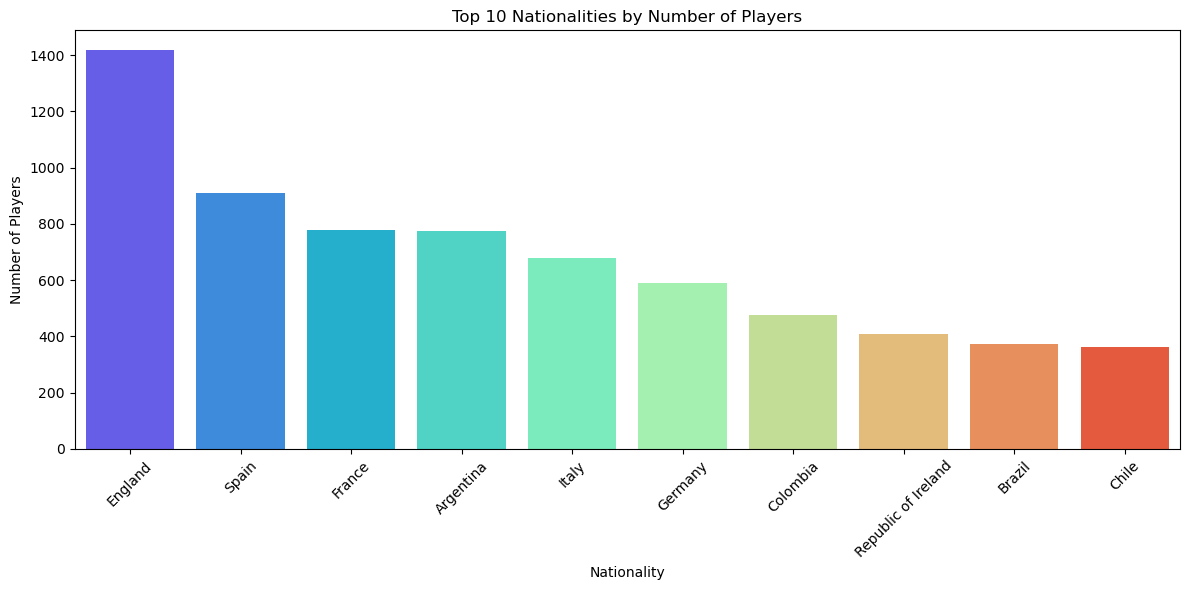

In [1513]:
top_nationalities = summary_nationality.head(10)

plt.figure(figsize=(12, 6)) 
sns.barplot(x=top_nationalities.index, y=top_nationalities['count'], palette='rainbow')
plt.title('Top 10 Nationalities by Number of Players')
plt.xlabel('Nationality')
plt.ylabel('Number of Players')
plt.xticks(rotation=45) 
plt.tight_layout()  
plt.show()  


### Explanation:
From the bar chart above, we can clearly see the top 10 Nationalities, with England on top with the most players, and Spain trailing right behind!

#### Histogram: Visualizing Overall Rating & Frequency!

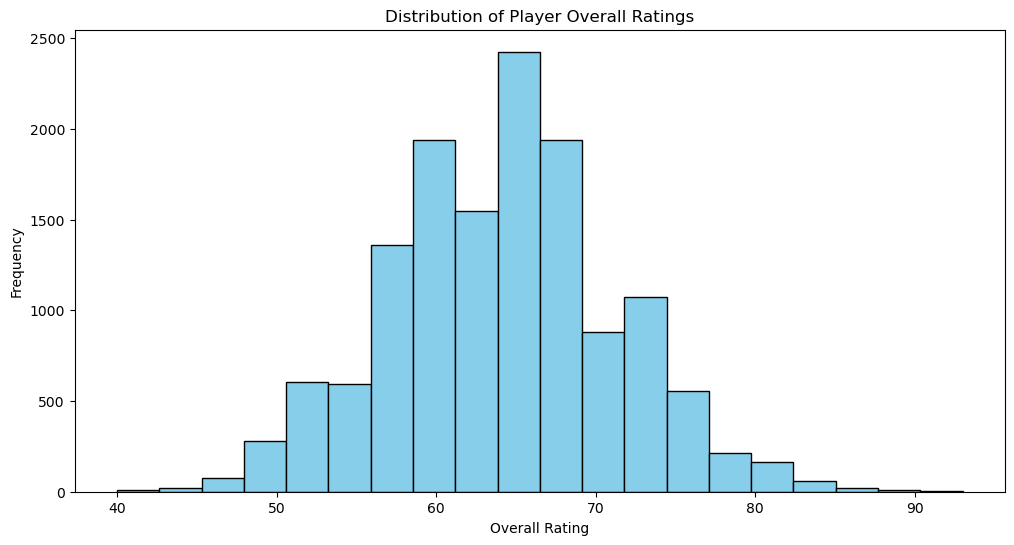

In [1516]:
plt.figure(figsize=(12, 6))
plt.hist(df['overall'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Player Overall Ratings')
plt.xlabel('Overall Rating')
plt.ylabel('Frequency')
plt.show()

### Explanation:
From the histogram above, we can evidently see that majority of the players have the overall rating between 60 and 70, with extremely few players crossing the 90 mark! So, on average players lie between the range of 60-70. 

###  Bivariate Analysis: Visualizations
#### Scatter Plot: Shooting vs Passing

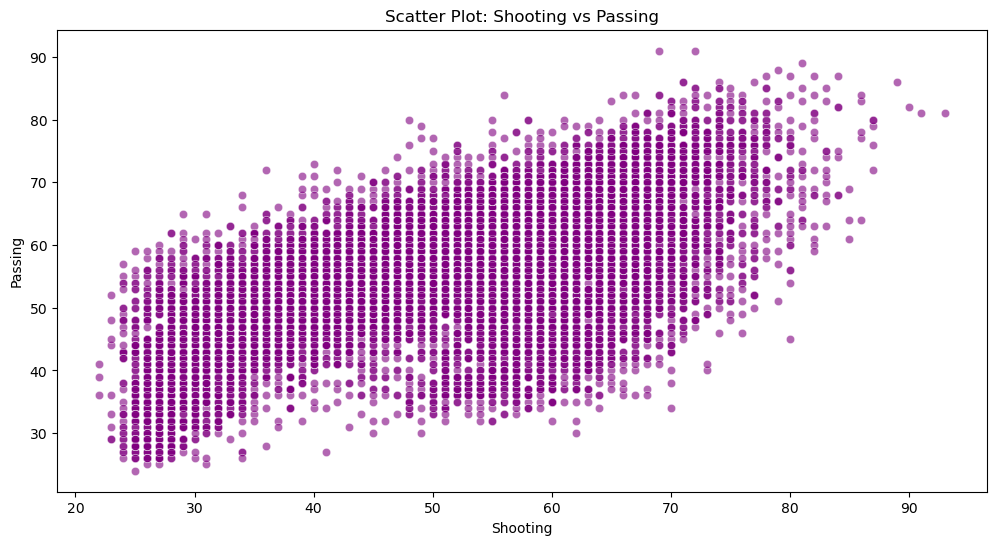

In [1519]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='shooting', y='passing', data=df, color='purple', alpha=0.6)
plt.title('Scatter Plot: Shooting vs Passing')
plt.xlabel('Shooting')
plt.ylabel('Passing')
plt.show()

### Explanation:

The graph above roughly shows a linear relationship between Shooting and Passing, which is expected as a player who's good at shooting will already be good at passing as it is sort of a pre-requisite to shooting. Although, the spread is a lot, we can still detect the overall dull linear relationship.

### Box Plot: Overall Rating by Player Position (Top 10 Positions)

/var/folders/f6/5t5nxy_j29b_krs7_jfmwl200000gn/T/ipykernel_27127/2131170121.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='nation_position', y='overall', data=df[df['nation_position'].isin(top_positions)], palette='coolwarm')


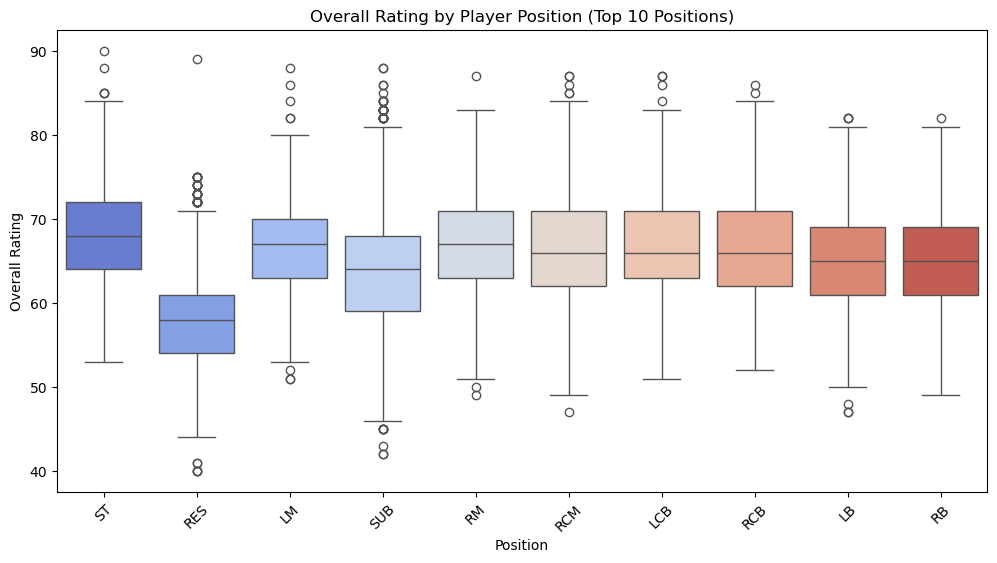

In [1522]:
top_positions = df['nation_position'].value_counts().head(10).index
plt.figure(figsize=(12, 6))
sns.boxplot(x='nation_position', y='overall', data=df[df['nation_position'].isin(top_positions)], palette='coolwarm')
plt.title('Overall Rating by Player Position (Top 10 Positions)')
plt.xlabel('Position')
plt.ylabel('Overall Rating')
plt.xticks(rotation=45)
plt.show() 

### Explanation:

#### Median Overall Ratings:

Highest: ST (Striker) has the highest median overall rating, indicating that strikers tend to have the highest overall scores compared to other positions.
Lowest: RES (Reserve) has the lowest median overall rating, suggesting that players in this position generally have lower overall scores.

#### Outliers:

There are a few outliers visible in the plot, particularly for the positions RES, LM, and RB. These outliers represent players with exceptionally high or low overall ratings compared to their peers.

#### General Trends:

#### Attacking Positions: 
ST, LM, RM, and RCM (attacking midfield positions) generally have higher median overall ratings, suggesting that players in these positions tend to have more consistent and higher overall scores.
Defensive Positions: LCB, RC, LB, and RB (defensive positions) have lower median overall ratings, indicating that there's more variation in overall scores among players in these positions.

#### Defensive Positions: 
LCB, RC, LB, and RB (defensive positions) have lower median overall ratings, indicating that there's more variation in overall scores among players in these positions.
Midfield Positions: SUB (Substitute) and RES (Reserve) have relatively low median overall ratings, suggesting that players in these positions often have lower overall scores.

#### Substitutes & Reserves: 
SUB (Substitute) and RES (Reserve) have relatively low median overall ratings, suggesting that players in these positions often have lower overall scores.

In general, the box plot offers significant insights into how overall ratings are distributed among various player positions. Finding the positions with the largest and narrowest overall score spreads, as well as the highest and lowest median overall ratings, is helpful. The plot also emphasizes the existence of outliers, which could be players with outstanding qualities or players in peculiar situations.


### Correlation Heatmap: Selected Numerical Attributes

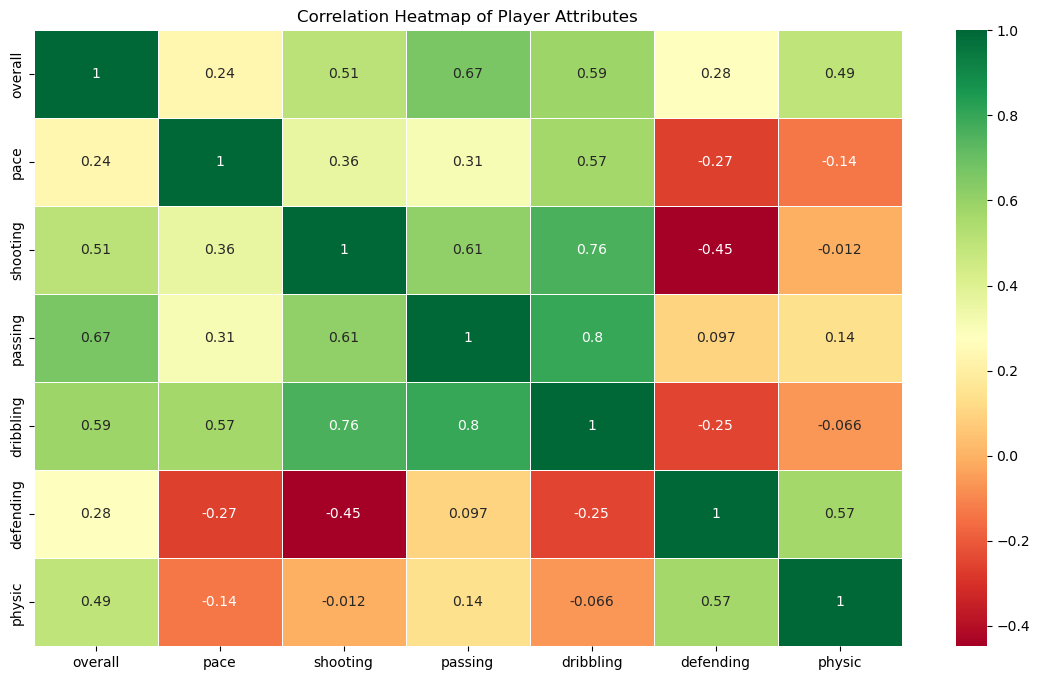

In [1525]:
plt.figure(figsize=(14, 8))
correlation_matrix = df[['overall', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='RdYlGn', linewidths=0.5)
plt.title('Correlation Heatmap of Player Attributes')
plt.show()


### Explanation:

The strongest positive correlation that we can see from the heatmap above is betweeen dribbling and passing (0.8), which essentially means that higher dribbling skills indicate higher passing skills as well, which is understandable since in football, passing is almost always praticed in paraller with dribbling.

In addition, the most negastive correlation we see is betweeen defending and shooting (-0.45). The reason behind this would most likely be the fact that Shooting is a skill mostly required by Strikers to put the ball in the back of the net, in the most precise manner (usually the top corners). Hence, we see conclude that strikers are good at striking and not so good at defending, since its not their forte!



### Multivariate Analysis: Example 1:

#### Pair Plot: Multivariate Analysis

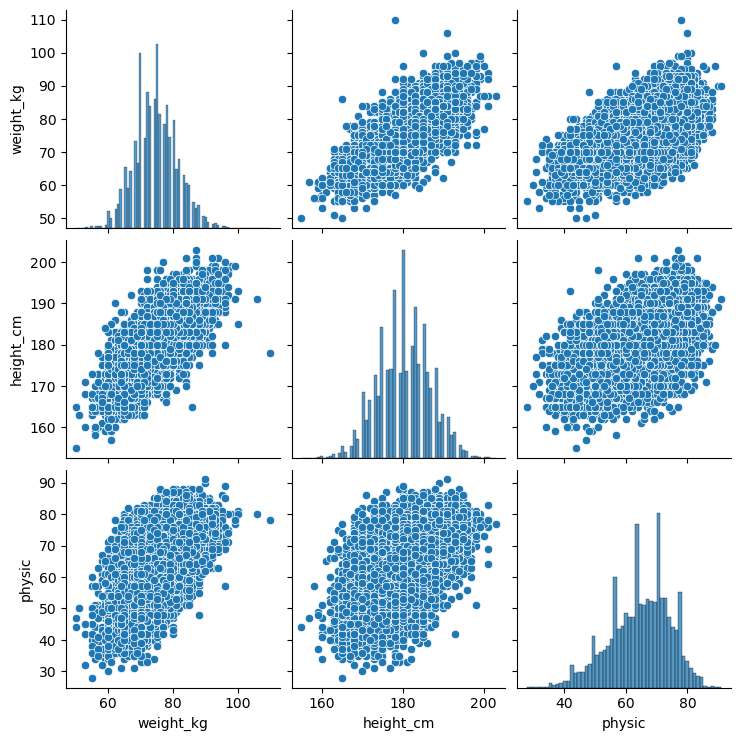

In [1528]:
# There are multiple ways to do multivariate analysis. Here, I've chosen the Pairplot method!
pair_plot = sns.pairplot(df[['weight_kg', 'height_cm', 'physic']])
plt.show()

### Explanation:


#### 1. Distributions (Diagonals):
##### weight_kg: 
The distribution of weight appears to be approximately normal, centered around 75 kg, with a range roughly between 50 kg and 110 kg.

##### height_cm: 
The height distribution also appears normal, centered around 175 cm, with most values ranging from 160 cm to 200 cm.
physic: This variable, likely a physical measurement or score, has a slightly right-skewed distribution, with a peak around 60, ranging between 30 and 90.

#### 2. Scatter Plots (Off-diagonals):
weight_kg vs. height_cm: There is a positive linear relationship between weight and height. As height increases, weight tends to increase as well, suggesting that taller individuals generally weigh more.
weight_kg vs. physic: There is also a positive relationship between weight and physic, indicating that as weight increases, the physic score or measurement tends to increase as well.
height_cm vs. physic: A positive correlation is also observed here, with taller individuals having higher physic scores.

#### 3. Correlation Insights:
All scatter plots suggest strong positive correlations between the variables. The data points form an elliptical shape along a line with a positive slope in each plot, indicating strong linear relationships.

#### 4. Outliers:
There are a few outliers in the data, particularly in the weight_kg vs. height_cm plot, where some points deviate significantly from the general linear trend.

#### 5. General Interpretation:
The variables are strongly correlated, likely indicating related measurements or factors contributing to a common physical characteristic or fitness score.

#### Overall:
This pair plot suggests that individuals who are taller and weigh more also tend to have higher physic scores, which could relate to strength, fitness, or other physical attributes.









### Multivariate Analysis: Example 2:
#### Comparing skills amongst 3 of my all time favorite FIFA teams!


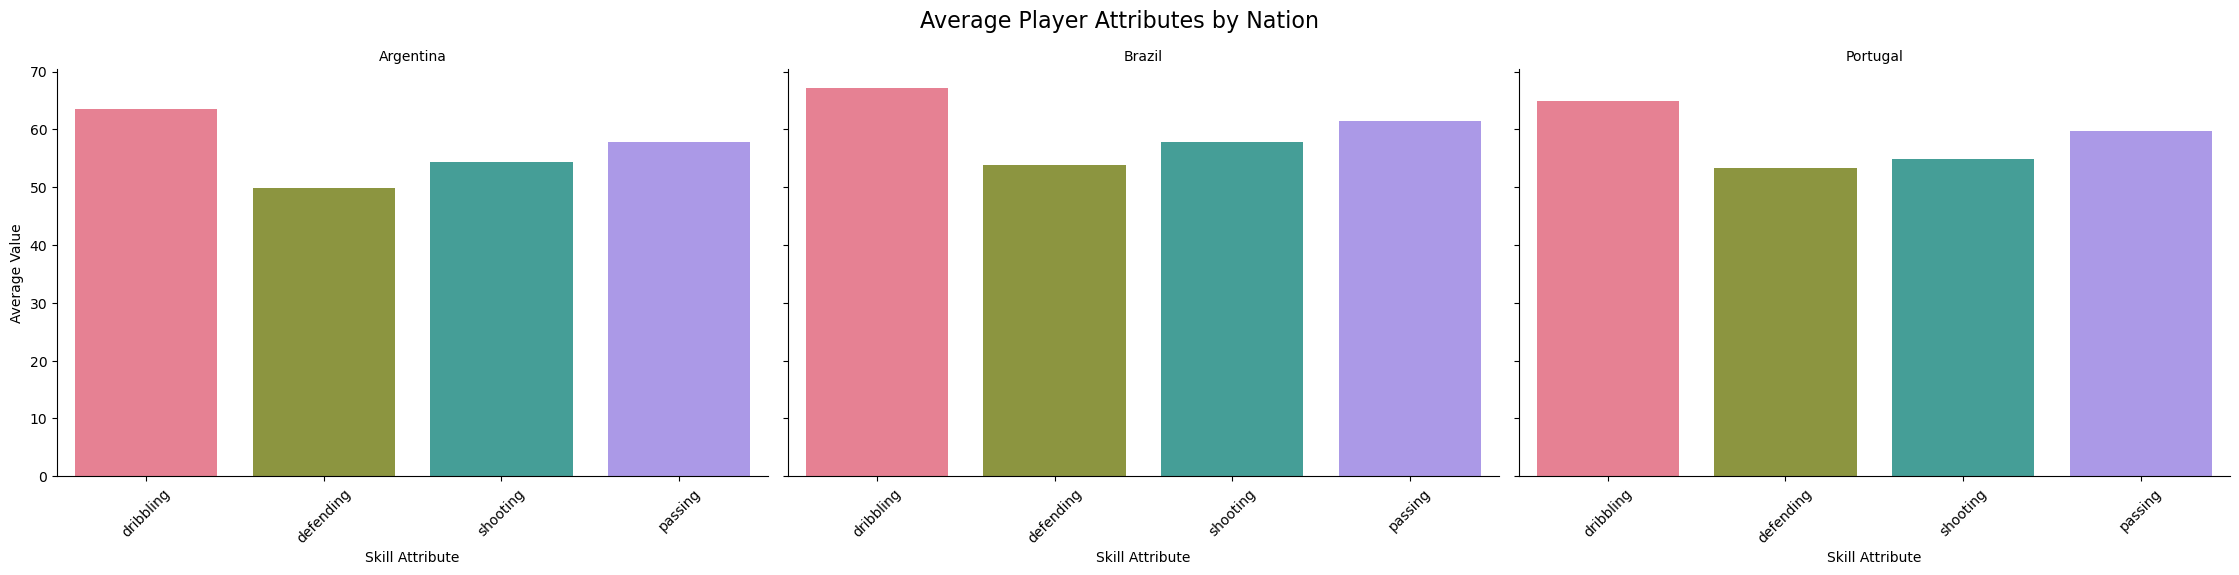

In [1566]:
chosen_nations = ['Argentina', 'Portugal', 'Brazil']
selected_attributes = ['dribbling', 'defending', 'shooting', 'passing']

filtered_df = df[df['nationality'].isin(chosen_nations)]

average_attrs = filtered_df.groupby('nationality')[selected_attributes].mean().reset_index()

melted_df = pd.melt(average_attrs, id_vars='nationality', value_vars=selected_attributes,
                    var_name='attribute', value_name='average_value')

palette = sns.color_palette('husl', len(selected_attributes))

g = sns.FacetGrid(melted_df, col='nationality', col_wrap=3, height=5, aspect=1.5, sharey=True)
g.map_dataframe(sns.barplot, x='attribute', y='average_value', hue='attribute', palette=palette, legend=False)
g.set_axis_labels('Skill Attribute', 'Average Value')
g.set_titles(col_template='{col_name}')
g.set_xticklabels(rotation=45)
g.fig.suptitle('Average Player Attributes by Nation', fontsize=16, y=1.05)

plt.show()

#### Analysis:

The image compares football skills—dribbling, kicking, shooting, and passing—across Argentina, Brazil, and Portugal. Dribbling consistently ranks highest for all three nations, suggesting a shared emphasis on ball control. Brazil exhibits a balanced skill distribution, Argentina shows a notable disparity between dribbling and other skills, and Portugal excels in passing. These differences likely reflect distinct tactical strategies and player development focuses. Brazil slightly leads in shooting and kicking, though kicking remains the lowest-rated skill for all three countries. This analysis provides insights into the unique playing styles of these football powerhouses and could inform understanding of national football cultures and scouting priorities.